# Red Wine Quality Multiclass Classification
Name: Lina Al Waqfi
#####Student Number: 501279460
##Introduction:
In this project, PyCaret open-source library will be used to perform the classification for red wine quality. Data has been taked from UCI Machine Learning Repository and the link to the source file will be found in the references.
The main challenges in the data processing:
1. Data is not balanced and most of the values are in the 5-7 ranges.
2. Determining the optimal number of categories/bins

The follwing libraries have been used in the model:
1. Pandas
2. Numpy
3. PyCaret
4. Seaborn
5. Matplotlib


The workflow in this project will based on the main workflow for PyCaret as follow:
1. Setup
2. Compare Models
3. Analyze Models
4. Prediction
5. Save Model

#####However some additional steps that involve pre-processing the data and importing libraries will be intergrated within the workflow


## 1. Installating and Importing Libraries

In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Data and Overview

2.1 The data has been imported from the source link, unzipped, and a delimeter ";" has been identified as the seperator to covert it to a tabular format. The tables below show the feature columns along with more details on the values of the target column "Quality". The next steps are to check for missing values and duplicates. Quality has been changed to category and checked for data imbalance

In [ ]:
#import the data set directly from the source file
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip
!unzip -q wine.zip

In [ ]:
data = pd.read_csv('winequality-red.csv' , delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

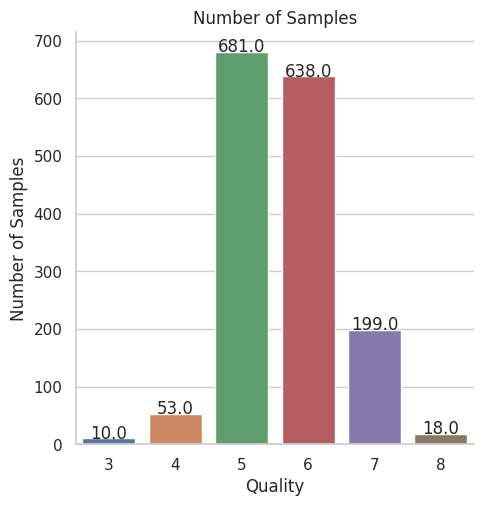

In [ ]:
# Catplot visualization to demonstrate the count
sns.set(style="whitegrid")
g = sns.catplot(x='quality', data=data, kind='count', palette='deep')

ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Number of Samples")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()


In [ ]:
data.shape

(1599, 12)

##### There is one element in the DataFrame for each row, and the DataFrame is not empty as shown below

In [ ]:
len(data) == data.shape[0]

True

In [ ]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


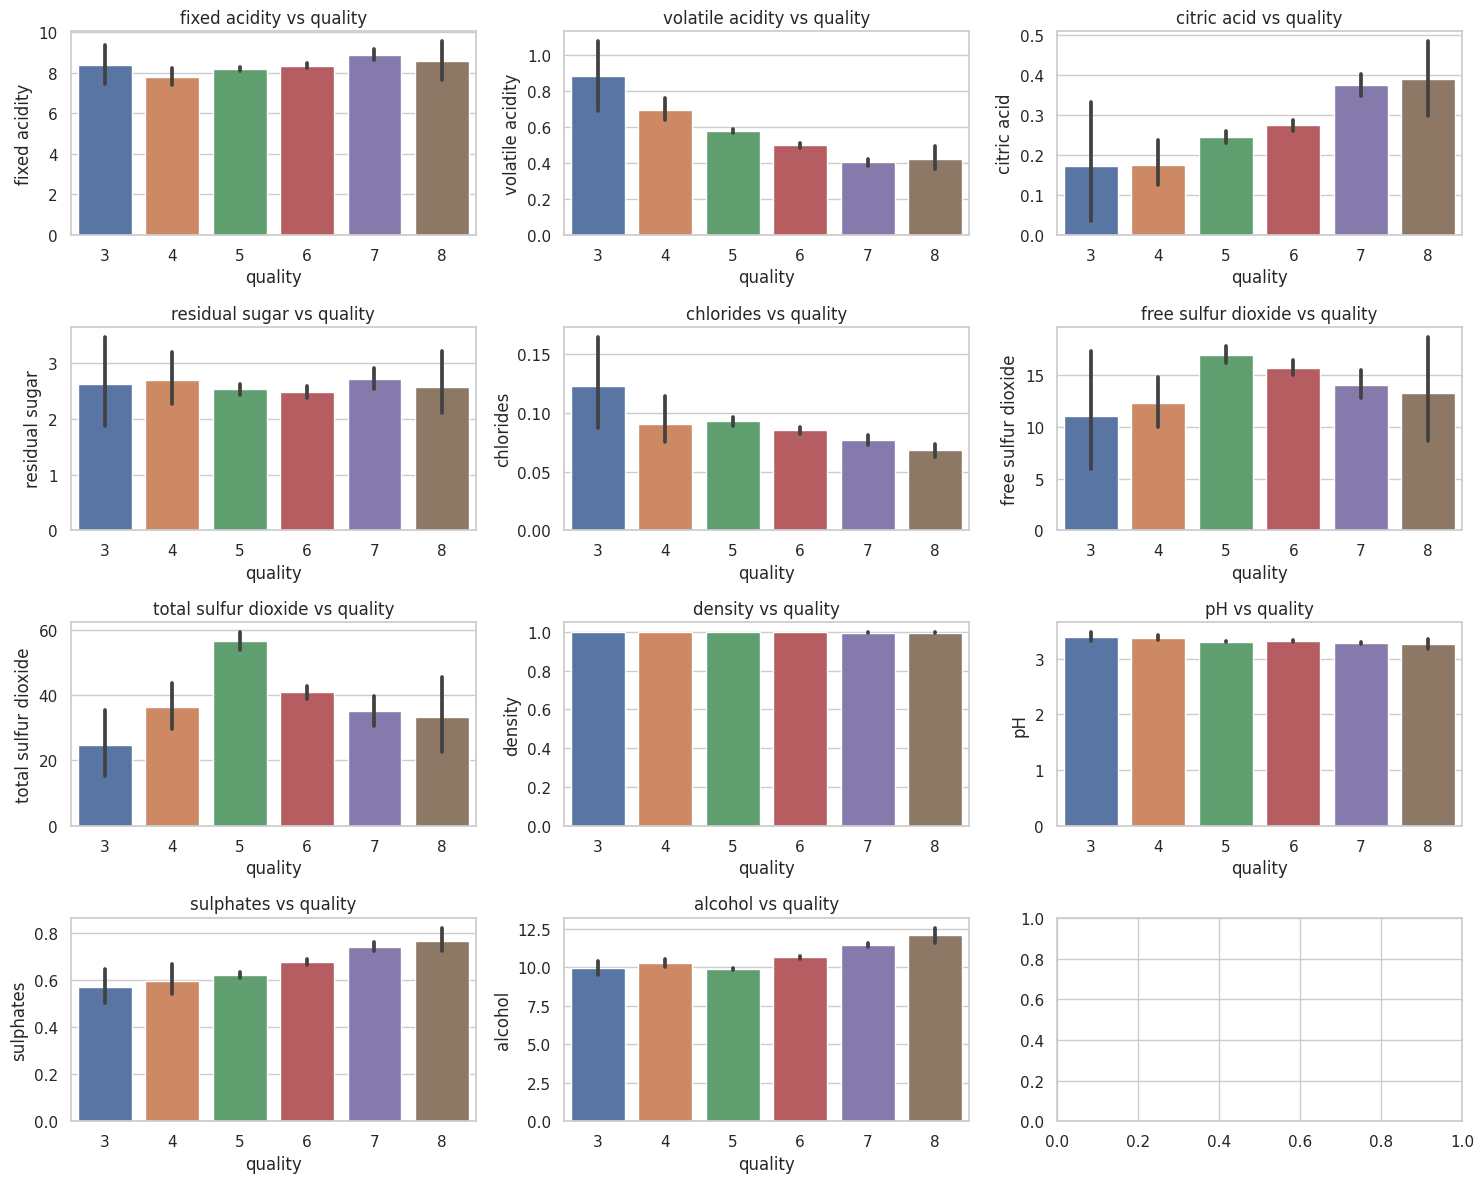

In [ ]:
# The features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=data, ax=axes[i])
    axes[i].set_xlabel('quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} vs quality')

plt.tight_layout()

plt.show()

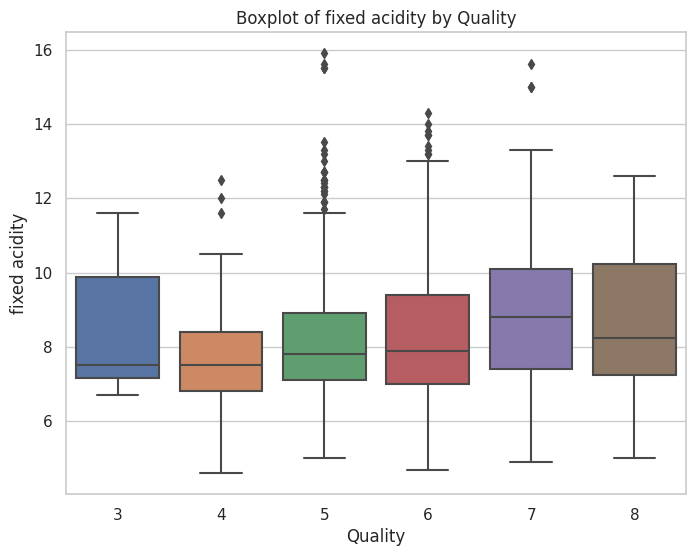

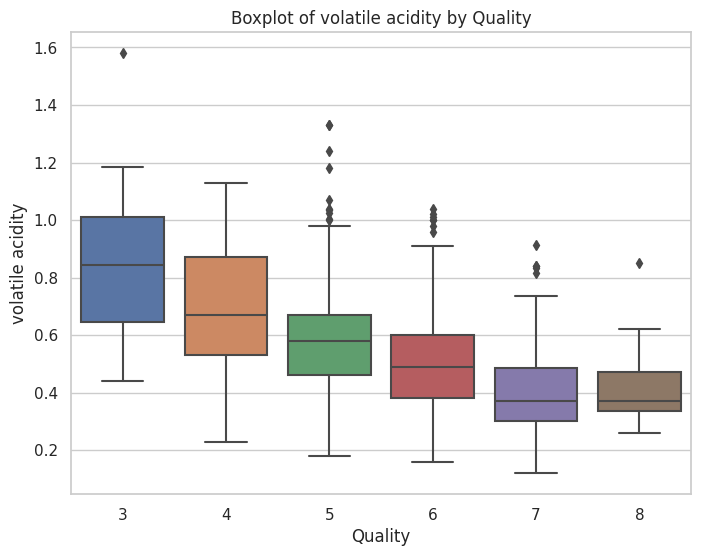

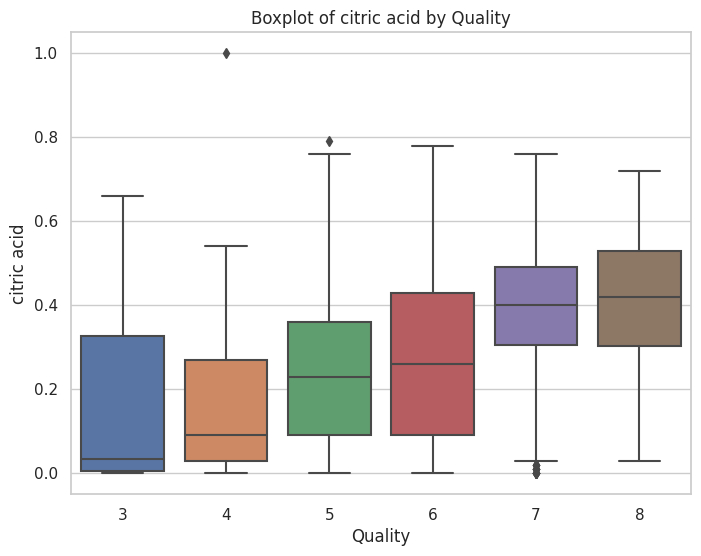

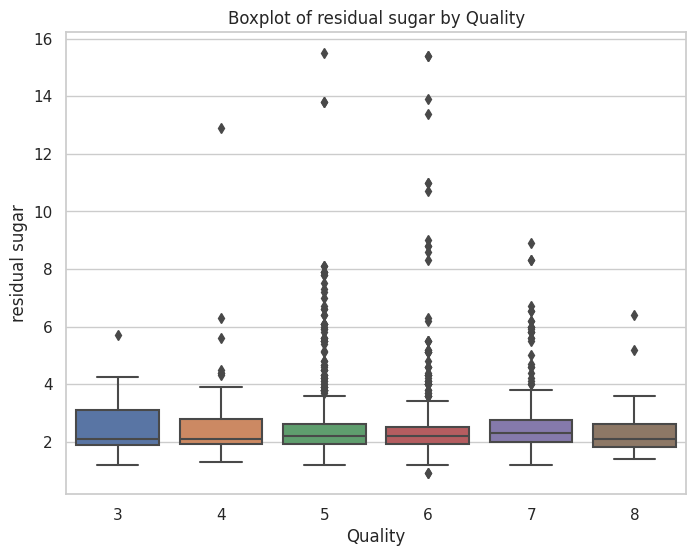

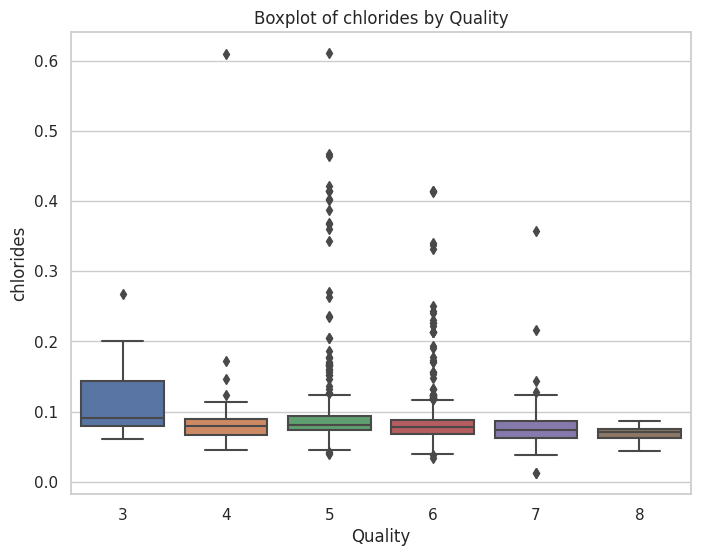

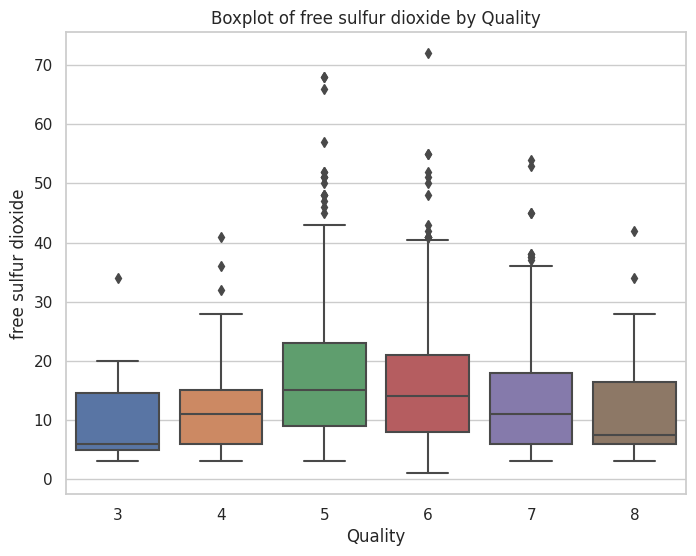

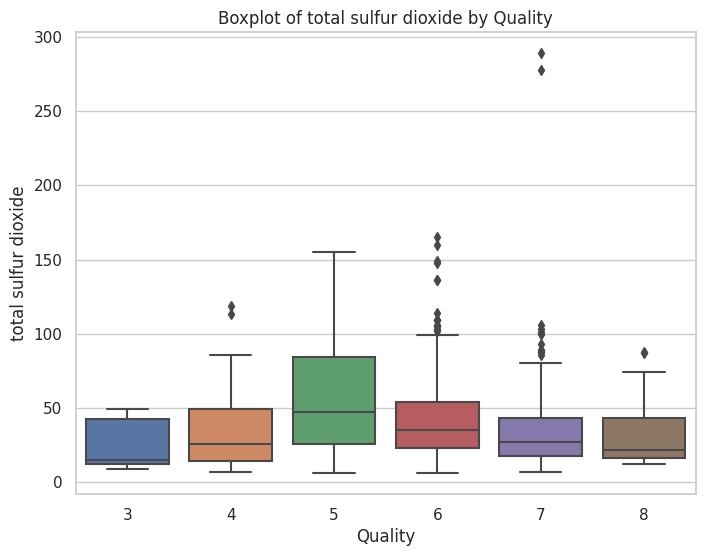

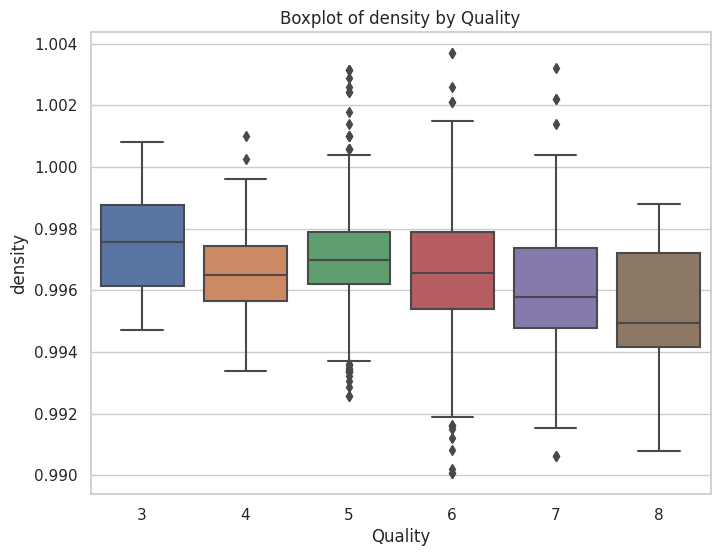

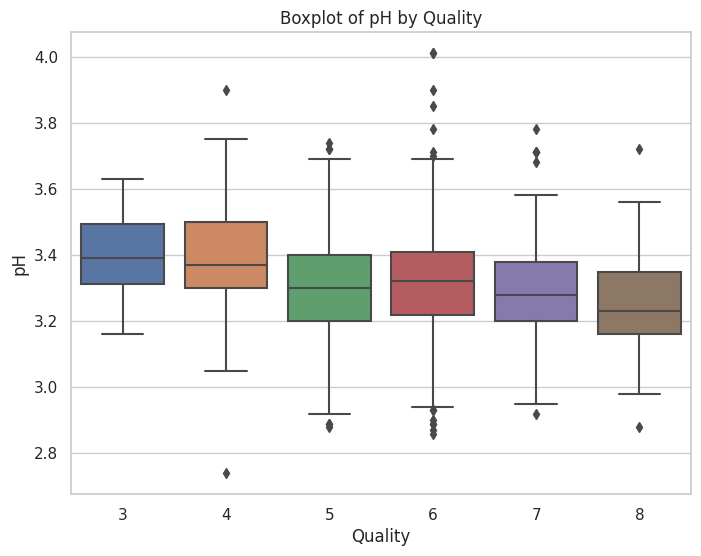

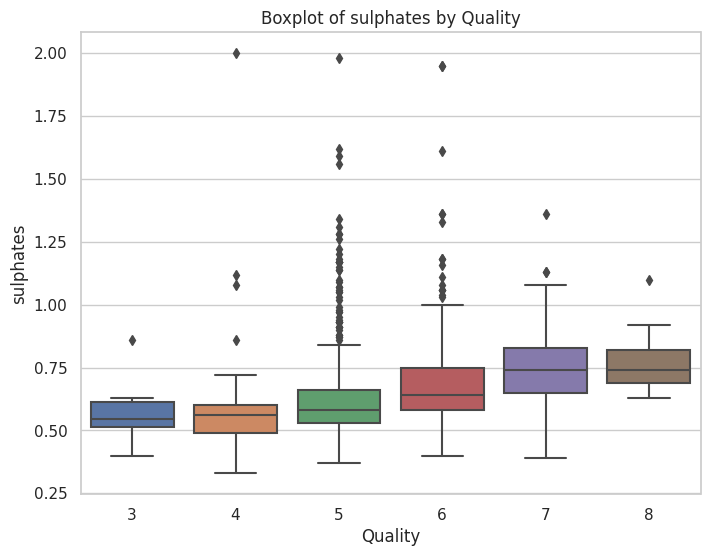

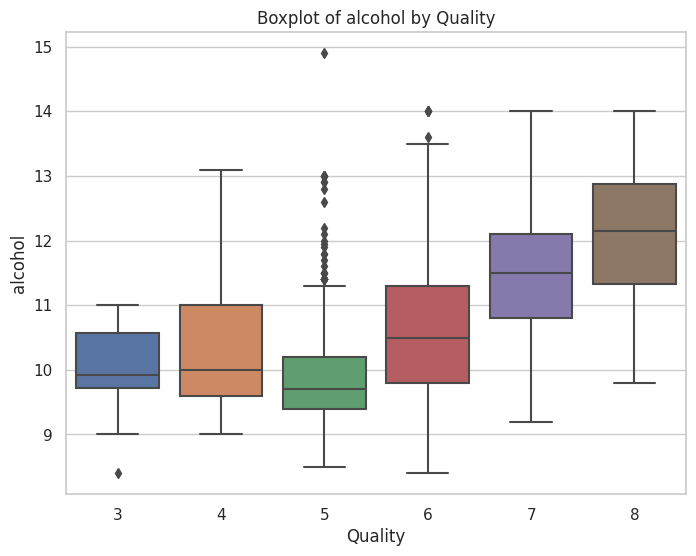

In [ ]:
 # The below graph shows boxplot grouped by 'quality'
    for label in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=label, data=data)
    plt.title(f'Boxplot of {label} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(label)
    plt.show()


In [ ]:
#To help with understanding the data when creating the bins
data['quality'].quantile([0.25,0.50,0.75])

0.25    5.0
0.50    6.0
0.75    6.0
Name: quality, dtype: float64

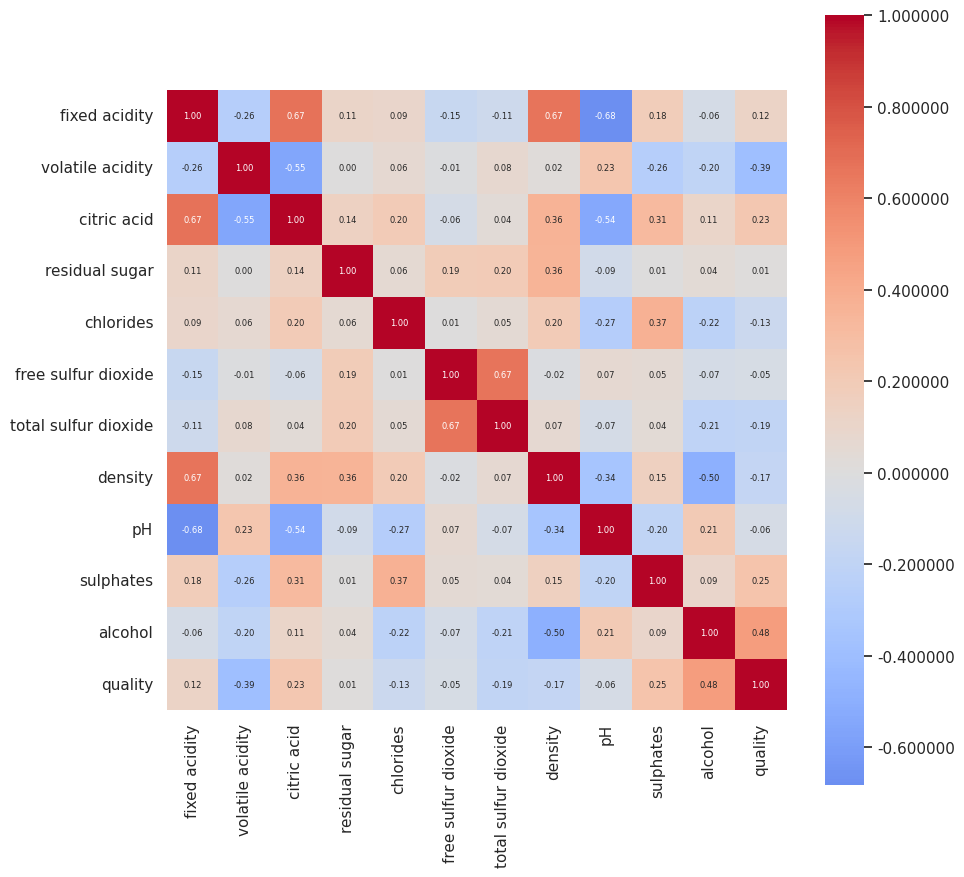

In [ ]:
# The correlation matrix
correlation = data.corr()

# Set the colormap to 'coolwarm'
cmap = 'coolwarm'

# Create the heatmap with the adjusted colormap and centered color scale
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 6}, cmap=cmap, center=0, cbar_kws={'format': '%1f'})
plt.show()



In [ ]:
# Check for missing values- as we can see below, there are no missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Check for duplicate entries
duplicates = data[data.duplicated()]

# Display duplicate entries
print("Duplicate Entries:")
print(duplicates)

Duplicate Entries:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      fr

In [ ]:
# Drop duplicate entries -240 rows
data = data.drop_duplicates()

In [ ]:
#data shape after deleting duplicates
data.shape

(1359, 12)

In [ ]:
data.quality.value_counts()
#the majority of duplicate data is in the "quality" of 5, 6 and 7 hence dropping duplicated will help with improving data imbalance

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [ ]:
data['quality'].quantile([0.25,0.50,0.75])

0.25    5.0
0.50    6.0
0.75    6.0
Name: quality, dtype: float64

The quality bins have been created based on natural breaks, to minimize variance between data as the data imbalance is high. Wine quality could be classified into 3 or 5-6 categories. Three classes have been chosen based on data understanding, the silhouette score below and based on the workd done by Canizo, B. V., Escudero, L. B., Pellerano, R. G., & Wuilloud, R. G. (2019), where 3 and 6 categories have been compared, leading to a better performance when the quality has been classified into 3 categories

In [ ]:
# Quality bins:
# 0-5 Low Quality
# 6-7 Medium Quality
# 8-10 High Quality

def map_quality(quality):
    if quality <= 5:
        return 'low'
    elif quality<= 7:
      return 'medium'
    else:
        return 'High'

In [ ]:
data['quality_category'] = data['quality'].apply(map_quality)

<ipython-input-33-448264e5238b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality_category'] = data['quality'].apply(map_quality)


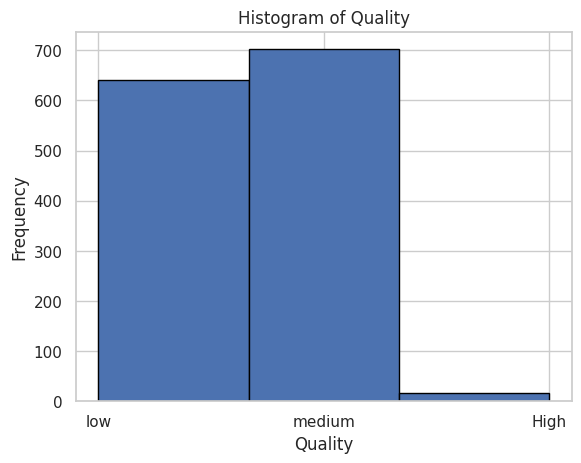

In [ ]:
quality_data = data['quality_category']

# number of bins
num_bins = 3

# Plot the histogram
plt.hist(quality_data, bins=num_bins, edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Quality')
plt.show()


As shown in the above histogram, the imbalance of data is very high however the oversampling of the least bin will help in fixing the imbalance

In [ ]:
data1 = data.drop(columns=['quality'])

In [ ]:
data1['quality_category'] = data1['quality_category'].astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality_category      1359 non-null   category
dtypes: category(1), float64(11)
memory usage: 128.9 KB


In [ ]:
# Display the columns in your DataFrame
print(data1.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_category'],
      dtype='object')


The count of quality-category still remains not balanced where more than 45% of the quality in the low range, therefore in PyCaret data will be balanced based on oversampling method.

# 3. PyCaret Setup
#####This function initializes the training environment and creates the transformation pipeline. The high imbalance in data has been fixed by oversampling the minority as the other two groups are almost equal in size and have no issues. The test dataset account for 22% of the overall dataset. Given the small size of the data, this % seems to be reasonable.

In [ ]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

In [ ]:
# import pycaret classification and init setup, the train size has chosedn to be 0.8 due to small data size
from pycaret.classification import *
s= setup(data1, target = 'quality_category', session_id=177, log_experiment=False,
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

,Description,Value
0,Session id,177
1,Target,quality_category
2,Target type,Multiclass
3,Target mapping,"High: 0, low: 1, medium: 2"
4,Original data shape,"(1359, 12)"
5,Transformed data shape,"(1842, 12)"
6,Transformed train set shape,"(1434, 12)"
7,Transformed test set shape,"(408, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
# check the type of exp
type(s)

pycaret.classification.oop.ClassificationExperiment

## 4. Compare Models

Compare models is a convenient way to quickly assess the performance of different models without manually training and evaluating each one

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7382,0.8132,0.7382,0.7447,0.7397,0.4919,0.4940,0.8640
et,Extra Trees Classifier,0.7319,0.8110,0.7319,0.7371,0.7324,0.4771,0.4799,0.6390
xgboost,Extreme Gradient Boosting,0.7235,0.8003,0.7235,0.7325,0.7264,0.4658,0.4677,0.3610
lightgbm,Light Gradient Boosting Machine,0.7213,0.7993,0.7213,0.7265,0.7219,0.4586,0.4608,3.9500
catboost,CatBoost Classifier,0.7203,0.8145,0.7203,0.7296,0.7231,0.4586,0.4608,11.5040
qda,Quadratic Discriminant Analysis,0.7087,0.7803,0.7087,0.7063,0.7064,0.4278,0.4293,0.2020
gbc,Gradient Boosting Classifier,0.7046,0.8063,0.7046,0.7221,0.7114,0.4359,0.4383,1.6260
ada,Ada Boost Classifier,0.6520,0.6265,0.6520,0.6869,0.6475,0.3448,0.3643,0.3770
lr,Logistic Regression,0.6510,0.7595,0.6510,0.7196,0.6743,0.3832,0.3942,1.0250
knn,K Neighbors Classifier,0.6509,0.7387,0.6509,0.7007,0.6719,0.3599,0.3648,0.1230


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7382,0.8155,0.7382,0.7464,0.7395,0.4912,0.4946,0.7800
et,Extra Trees Classifier,0.7361,0.8126,0.7361,0.7406,0.7362,0.4846,0.4874,0.5730
catboost,CatBoost Classifier,0.7245,0.8147,0.7245,0.7328,0.7268,0.4670,0.4692,12.0660
lightgbm,Light Gradient Boosting Machine,0.7213,0.8029,0.7213,0.7290,0.7234,0.4611,0.4630,2.0110
gbc,Gradient Boosting Classifier,0.7182,0.8079,0.7182,0.7324,0.7236,0.4592,0.4615,1.4790
xgboost,Extreme Gradient Boosting,0.7119,0.8024,0.7119,0.7184,0.7139,0.4409,0.4425,0.3500
qda,Quadratic Discriminant Analysis,0.7087,0.7805,0.7087,0.7055,0.7060,0.4271,0.4286,0.1790
lr,Logistic Regression,0.6573,0.7596,0.6573,0.7225,0.6804,0.3908,0.4008,0.1840
ada,Ada Boost Classifier,0.6519,0.6341,0.6519,0.6929,0.6483,0.3468,0.3679,0.2370
knn,K Neighbors Classifier,0.6477,0.7395,0.6477,0.6987,0.6694,0.3557,0.3605,0.2200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=177, verbose=0, warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## 5. Running and Tunning the Models

Based on the comparison of different models, the following models will be selecetd for the analysis and will be tuned to find the hyperparameter values that make the model generalize well to new, unseen data
1. 	Random Forest Classifier
2. CatBoost Classifier
3. Extreme Gradient Boosting
4. Extra Trees Classifier

In [ ]:
#Random forest classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7188,0.8165,0.7188,0.7361,0.7257,0.4712,0.4722
1,0.7579,0.8007,0.7579,0.7590,0.7577,0.5235,0.5246
2,0.7895,0.8662,0.7895,0.8154,0.8017,0.5997,0.6016
3,0.7263,0.8298,0.7263,0.7425,0.7342,0.4729,0.4734
4,0.7474,0.8043,0.7474,0.7396,0.7434,0.4993,0.4995
5,0.7158,0.8216,0.7158,0.7405,0.7114,0.4489,0.4688
6,0.8000,0.9037,0.8000,0.7940,0.7952,0.6019,0.6048
7,0.7895,0.8143,0.7895,0.7813,0.7852,0.5821,0.5825
8,0.6842,0.7926,0.6842,0.7074,0.6939,0.4005,0.4029


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the hyperparameters of the Random Forest model
tuned_random_forest_model = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6562,0.8192,0.6562,0.7199,0.6752,0.3952,0.4077
1,0.7789,0.8241,0.7789,0.7802,0.7788,0.5650,0.5661
2,0.7474,0.8554,0.7474,0.7640,0.7555,0.5134,0.5140
3,0.6947,0.8270,0.6947,0.7253,0.7096,0.4244,0.4258
4,0.7053,0.7715,0.7053,0.7004,0.7012,0.4179,0.4199
5,0.7053,0.8348,0.7053,0.7313,0.7049,0.4333,0.4484
6,0.8000,0.8966,0.8000,0.8086,0.8042,0.6115,0.6117
7,0.7368,0.8163,0.7368,0.7369,0.7368,0.4830,0.4831
8,0.6947,0.8050,0.6947,0.7242,0.7053,0.4305,0.4332


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#CatBoost Classifier
catboost_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7396,0.8193,0.7396,0.7502,0.7440,0.5068,0.5072
1,0.7684,0.8247,0.7684,0.7779,0.7726,0.5490,0.5498
2,0.7368,0.8405,0.7368,0.7529,0.7448,0.4936,0.4940
3,0.7368,0.8292,0.7368,0.7447,0.7407,0.4884,0.4885
4,0.7684,0.7911,0.7684,0.7632,0.7640,0.5427,0.5452
5,0.7053,0.8133,0.7053,0.7146,0.6974,0.4220,0.4372
6,0.7474,0.8941,0.7474,0.7492,0.7469,0.5024,0.5042
7,0.7579,0.8003,0.7579,0.7580,0.7579,0.5244,0.5245
8,0.6842,0.8153,0.6842,0.7092,0.6954,0.3964,0.3981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the hyperparameters of the CatBoost model
tuned_catboost_model = tune_model(catboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7292,0.8019,0.7292,0.7469,0.7363,0.4927,0.4938
1,0.7263,0.8099,0.7263,0.7351,0.7301,0.4670,0.4677
2,0.7263,0.8227,0.7263,0.7425,0.7335,0.4747,0.4760
3,0.7053,0.8116,0.7053,0.7206,0.7128,0.4328,0.4332
4,0.7368,0.7950,0.7368,0.7308,0.7328,0.4799,0.4812
5,0.7579,0.8336,0.7579,0.7572,0.7528,0.5231,0.5298
6,0.7684,0.8853,0.7684,0.7615,0.7639,0.5394,0.5411
7,0.7368,0.8156,0.7368,0.7396,0.7361,0.4812,0.4839
8,0.6632,0.7940,0.6632,0.6873,0.6740,0.3562,0.3577


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# XGBoost model
xgboost_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8028,0.6875,0.7104,0.6966,0.4203,0.4219
1,0.7368,0.7864,0.7368,0.7369,0.7368,0.4830,0.4831
2,0.7579,0.8397,0.7579,0.7754,0.7651,0.5357,0.5380
3,0.7158,0.7902,0.7158,0.7182,0.7149,0.4397,0.4421
4,0.7263,0.8023,0.7263,0.7238,0.7216,0.4605,0.4649
5,0.7158,0.7949,0.7158,0.7147,0.7108,0.4402,0.4458
6,0.7789,0.8789,0.7789,0.7811,0.7778,0.5642,0.5673
7,0.7053,0.8093,0.7053,0.7129,0.7090,0.4270,0.4271
8,0.6632,0.8184,0.6632,0.6961,0.6778,0.3621,0.3644


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the XGBoost model
tuned_xgboost_model = tune_model(xgboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7915,0.6875,0.7422,0.7085,0.4425,0.4497
1,0.7474,0.8172,0.7474,0.7565,0.7500,0.5134,0.5140
2,0.7263,0.8346,0.7263,0.7420,0.7340,0.4738,0.4743
3,0.7158,0.8216,0.7158,0.7239,0.7196,0.4470,0.4473
4,0.7263,0.7867,0.7263,0.7196,0.7224,0.4586,0.4593
5,0.7474,0.8178,0.7474,0.7591,0.7446,0.5084,0.5197
6,0.8105,0.8984,0.8105,0.8147,0.8111,0.6310,0.6320
7,0.7579,0.8128,0.7579,0.7504,0.7536,0.5189,0.5198
8,0.6737,0.8026,0.6737,0.6994,0.6845,0.3758,0.3780


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Extra Trees Classifier
extra_trees_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7396,0.8136,0.7396,0.7510,0.7440,0.5056,0.5063
1,0.7368,0.7812,0.7368,0.7396,0.7361,0.4812,0.4839
2,0.7684,0.8658,0.7684,0.7850,0.7765,0.5548,0.5553
3,0.7368,0.8231,0.7368,0.7466,0.7406,0.4870,0.4884
4,0.7263,0.7938,0.7263,0.7213,0.7222,0.4595,0.4617
5,0.7158,0.8222,0.7158,0.7119,0.7114,0.4392,0.4423
6,0.7789,0.8636,0.7789,0.7857,0.7779,0.5635,0.5696
7,0.7579,0.7964,0.7579,0.7518,0.7531,0.5181,0.5206
8,0.6947,0.8353,0.6947,0.7025,0.6984,0.4060,0.4063


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the hyperparameters of the Extra Trees Classifier
tuned_et_model = tune_model(extra_trees_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6146,0.7996,0.6146,0.6952,0.6226,0.3333,0.3580
1,0.7474,0.7930,0.7474,0.7803,0.7590,0.5291,0.5331
2,0.7263,0.8361,0.7263,0.7755,0.7478,0.4953,0.5013
3,0.6526,0.8098,0.6526,0.7111,0.6709,0.3682,0.3798
4,0.6737,0.7624,0.6737,0.6868,0.6706,0.3715,0.3806
5,0.6842,0.7876,0.6842,0.7198,0.6903,0.4040,0.4161
6,0.7474,0.8552,0.7474,0.8029,0.7631,0.5398,0.5526
7,0.7158,0.8098,0.7158,0.7482,0.7295,0.4658,0.4698
8,0.6421,0.7666,0.6421,0.6776,0.6517,0.3411,0.3468


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

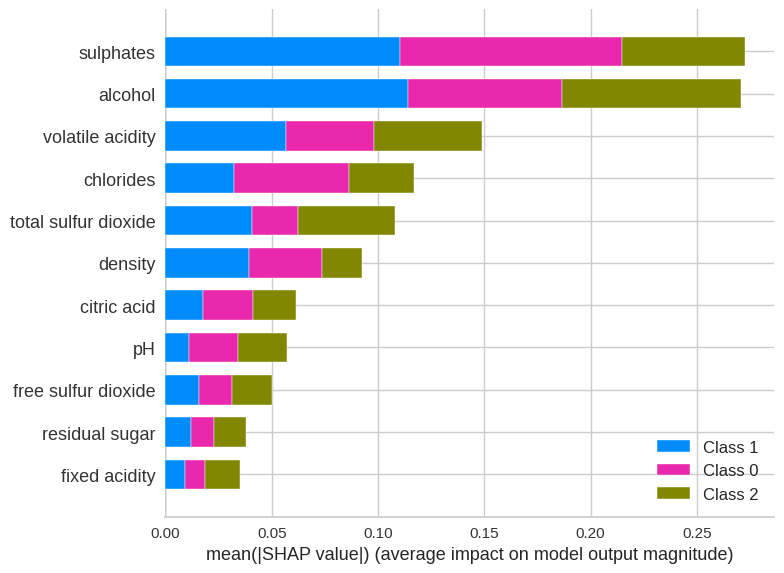

In [ ]:
# Interpret the model
interpret_model(best)

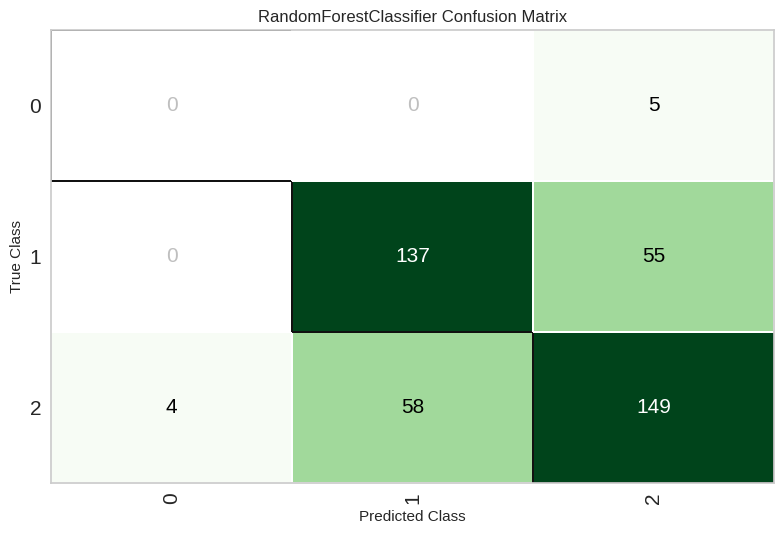

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

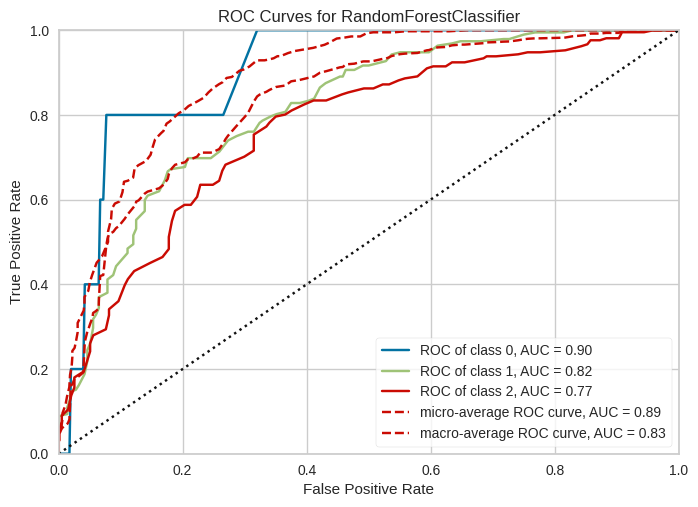

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

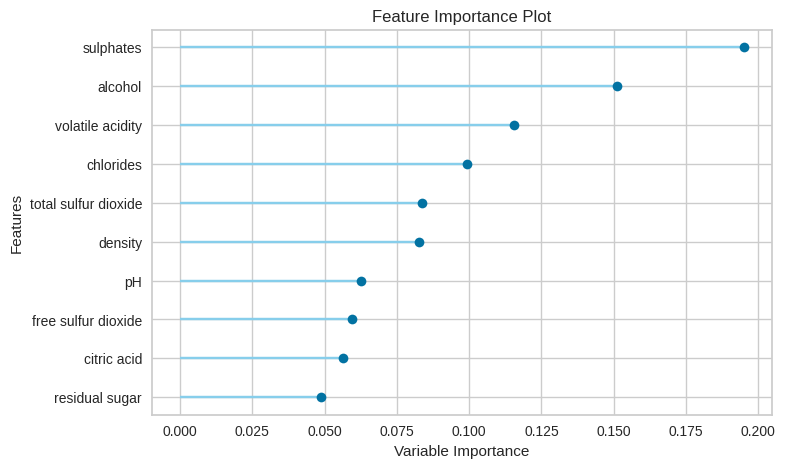

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7010,0.7922,0.7010,0.6993,0.7001,0.4137,0.4138


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category,prediction_label,prediction_score
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,medium,medium,0.72
857,8.2,0.26,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,medium,medium,0.86
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,low,medium,0.74
694,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,low,low,0.82
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,High,medium,0.81


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,low


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9102,0.9715,0.9102,0.9101,0.9102,0.8243,0.8243


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,low,0.92
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low,low,0.92
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low,low,0.86
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium,medium,0.83
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,low,low,0.92


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=177,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.classification import *
# s= setup(data1, target = 'quality_category', session_id=177, log_experiment=False, experiment_name='wine_q2', normalize=True, normalize_method='zscore', transformation=True, transformation_method = 'quantile', fix_imbalance=True, fix_imbalance_method= adasyn1)

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:
# help(setup)

## Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
rf_results = pull()
print(type(rf_results))
rf_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7396,0.8211,0.7396,0.7502,0.7440,0.5068,0.5072
1,0.7579,0.8037,0.7579,0.7610,0.7573,0.5227,0.5256
2,0.7579,0.8531,0.7579,0.7832,0.7692,0.5400,0.5424
3,0.7368,0.8137,0.7368,0.7452,0.7408,0.4879,0.4883
4,0.7684,0.7887,0.7684,0.7604,0.7644,0.5411,0.5412
5,0.7368,0.8258,0.7368,0.7562,0.7341,0.4888,0.5046
6,0.8105,0.8948,0.8105,0.8131,0.8103,0.6268,0.6290
7,0.7474,0.8082,0.7474,0.7396,0.7433,0.4985,0.4988
8,0.6842,0.8134,0.6842,0.7057,0.6918,0.4040,0.4053


In [ ]:
# train Random Forest with fold=4
rf = create_model('rf', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7353,0.8181,0.7353,0.7647,0.7474,0.5036,0.5055
1,0.7311,0.8035,0.7311,0.7374,0.7341,0.4788,0.4790
2,0.7437,0.8356,0.7437,0.7489,0.7458,0.5036,0.5041
3,0.7089,0.7744,0.7089,0.7120,0.7104,0.4328,0.4328
Mean,0.7297,0.8079,0.7297,0.7407,0.7344,0.4797,0.4804
Std,0.0129,0.0224,0.0129,0.0192,0.0148,0.0289,0.0294


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train rf and return train score
create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=177, verbose=0, warm_start=False)

In [ ]:
# help(create_model)

## Further Tune the Model



In [ ]:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=177, verbose=0, warm_start=False)

In [ ]:
# define tuning grid
et_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_et = tune_model(et, custom_grid = et_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6979,0.8100,0.6979,0.7082,0.7018,0.4265,0.4271
1,0.7684,0.7739,0.7684,0.7634,0.7633,0.5386,0.5425
2,0.7684,0.8672,0.7684,0.7855,0.7761,0.5555,0.5570
3,0.7368,0.7960,0.7368,0.7466,0.7406,0.4870,0.4884
4,0.7474,0.7919,0.7474,0.7422,0.7431,0.5011,0.5034
5,0.7158,0.7979,0.7158,0.7184,0.7098,0.4412,0.4502
6,0.8000,0.8625,0.8000,0.8038,0.7996,0.6057,0.6091
7,0.7579,0.8336,0.7579,0.7504,0.7536,0.5189,0.5198
8,0.6947,0.8308,0.6947,0.7025,0.6984,0.4060,0.4063


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_et, tuner = tune_model(et, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6458,0.8074,0.6458,0.7002,0.6619,0.3711,0.3812
1,0.7579,0.8018,0.7579,0.7922,0.7694,0.5491,0.5541
2,0.7158,0.8398,0.7158,0.7745,0.7387,0.4818,0.4917
3,0.6842,0.8126,0.6842,0.7347,0.7029,0.4191,0.4274
4,0.6842,0.7563,0.6842,0.7056,0.6812,0.3928,0.4065
5,0.7053,0.7838,0.7053,0.7367,0.7061,0.4391,0.4556
6,0.7684,0.8539,0.7684,0.8077,0.7788,0.5698,0.5791
7,0.7684,0.8185,0.7684,0.7972,0.7786,0.5611,0.5671
8,0.6526,0.7724,0.6526,0.6882,0.6633,0.3599,0.3651


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# model object
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=177, verbose=0, warm_start=False)

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'aci...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,

In [ ]:
# tune et using optuna
tuned_et = tune_model(et, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6562,0.7953,0.6562,0.7065,0.6767,0.3853,0.3904
1,0.7368,0.7937,0.7368,0.7475,0.7389,0.4919,0.4939
2,0.7158,0.8372,0.7158,0.7647,0.7394,0.4737,0.4770
3,0.6842,0.8175,0.6842,0.7308,0.7054,0.4172,0.4214
4,0.7158,0.7697,0.7158,0.7099,0.7119,0.4382,0.4395
5,0.6842,0.8178,0.6842,0.7195,0.6823,0.4000,0.4202
6,0.7684,0.8817,0.7684,0.7937,0.7775,0.5637,0.5659
7,0.7368,0.8030,0.7368,0.7530,0.7447,0.4940,0.4946
8,0.6737,0.7683,0.6737,0.7117,0.6911,0.3918,0.3947


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-25 23:04:48,726] Searching the best hyperparameters using 951 samples...
[I 2023-11-25 23:05:51,377] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# help(tune_model)

## Ensemble Model

In [ ]:
# ensemble with bagging
ensemble_model(et, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.8175,0.7083,0.7242,0.7161,0.4469,0.4473
1,0.7579,0.7955,0.7579,0.7610,0.7573,0.5227,0.5256
2,0.7684,0.8787,0.7684,0.7850,0.7765,0.5548,0.5553
3,0.7579,0.8412,0.7579,0.7681,0.7619,0.5281,0.5296
4,0.7263,0.8060,0.7263,0.7238,0.7216,0.4605,0.4649
5,0.7474,0.8212,0.7474,0.7531,0.7409,0.5037,0.5163
6,0.8000,0.8973,0.8000,0.8038,0.7996,0.6057,0.6091
7,0.7474,0.8276,0.7474,0.7478,0.7473,0.5033,0.5037
8,0.7053,0.8189,0.7053,0.7209,0.7129,0.4324,0.4328


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=177, verbose=0,
                                                 warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=177, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(et, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7292,0.8116,0.7292,0.7473,0.7373,0.4851,0.4864
1,0.7368,0.7766,0.7368,0.7307,0.7321,0.4762,0.4785
2,0.7684,0.8915,0.7684,0.7850,0.7765,0.5548,0.5553
3,0.7368,0.8254,0.7368,0.7466,0.7406,0.4870,0.4884
4,0.7368,0.7894,0.7368,0.7329,0.7324,0.4808,0.4841
5,0.7263,0.7997,0.7263,0.7271,0.7209,0.4614,0.4690
6,0.8105,0.8626,0.8105,0.8035,0.8059,0.6232,0.6251
7,0.7579,0.7987,0.7579,0.7504,0.7536,0.5189,0.5198
8,0.7263,0.8270,0.7263,0.7439,0.7342,0.4720,0.4733


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=-1,
                                                  oob_score=False,
                                                  random_state=177, verbose=0,
                                                  warm_start=False),
                   learning_rate=1.0, n_estimators=10, random_state=177)

In [ ]:
# help(ensemble_model)

## Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/78 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.6510,0.7595,0.6510,0.7196,0.6743,0.3832,0.3942
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6509,0.7387,0.6509,0.7007,0.6719,0.3599,0.3648
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.6257,0.7531,0.6257,0.7000,0.6476,0.3429,0.3575
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6341,0.6481,0.6341,0.6438,0.6374,0.2940,0.2956
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.5879,0.0000,0.5879,0.6684,0.6007,0.2802,0.2972
...,...,...,...,...,...,...,...,...,...
72,Extra Trees Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.7393,0.8170,0.7393,0.7456,0.7408,0.4928,0.4951
73,Extreme Gradient Boosting,"(TransformerWrapperWithInverse(exclude=None, i...",0.7235,0.8049,0.7235,0.7289,0.7243,0.4632,0.4654
74,Light Gradient Boosting Machine,"(TransformerWrapperWithInverse(exclude=None, i...",0.7287,0.7980,0.7287,0.7357,0.7309,0.4754,0.4767


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_samples_leaf=1,
                                                                  min_samples_split=2,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  n_estimators=100,
                                                                  n_jobs=-1,
                                                                  oob_score=False,
                                                                  random_state=177,
                                                                  verbose=0,
                                                                  warm_start=False),
                                   max_features=1.0, max_samples=1.0,
                                   n_estimators=10, n_jobs=None,
                                   oob_score=False, random_state=177, verbose=0,
                                   warm_start=False)]],
         verbose=False)

In [ ]:
# help(get_leaderboard)

## AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
automl()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=177, verbose=0, warm_start=False)

## Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(rf, display_format ='inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1797d4b36413878ba7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=177,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(rf, language = 'java'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=177,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,177
1,Target,quality_category
2,Target type,Multiclass
3,Target mapping,"High: 0, low: 1, medium: 2"
4,Original data shape,"(1359, 13)"
5,Transformed data shape,"(1835, 13)"
6,Transformed train set shape,"(1427, 13)"
7,Transformed test set shape,"(408, 13)"
8,Numeric features,12
9,Preprocess,True
